# Set-60 Model


## Build Set-60-Dataset

Copied 600 files to ../data/train_data_chest_xray_set_60/train/PNEUMONIA and 400 files to ../data/train_data_chest_xray_set_60/val/PNEUMONIA.
Copied 360 files to ../data/train_data_chest_xray_set_60/train/NORMAL and 240 files to ../data/train_data_chest_xray_set_60/val/NORMAL.


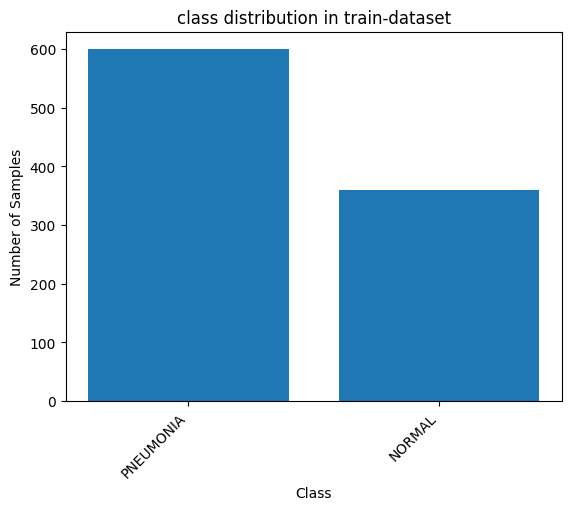

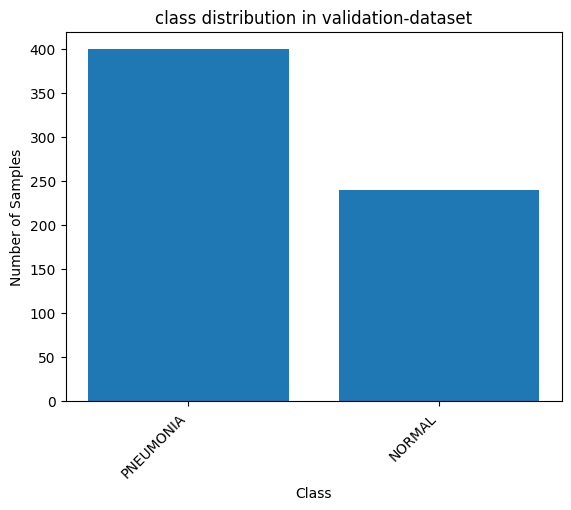

In [1]:
import shutil
import os
from dataset_splitter import copy_n_random_files
from plot_utils import plot_loss, plot_histogram_balance_of_dataset

train_data_dir = "../data/chest_xray/train/"
class1= "PNEUMONIA"
class2 = "NORMAL"
dest_folder1 = "../data/train_data_chest_xray_set_60"
dest_folder_train = os.path.join(dest_folder1, "train")
dest_folder_val = os.path.join(dest_folder1, "calibration")

train_split_ratio = 0.6

# Ensure folder is empty
if os.path.exists(dest_folder1):
    shutil.rmtree(dest_folder1)

copy_n_random_files(1000, os.path.join(train_data_dir, class1), os.path.join(dest_folder_train, class1), os.path.join(dest_folder_val, class1), train_split_ratio)
copy_n_random_files(600, os.path.join(train_data_dir, class2), os.path.join(dest_folder_train, class2), os.path.join(dest_folder_val, class2), train_split_ratio)

plot_histogram_balance_of_dataset(dest_folder_train, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(dest_folder_val, "class distribution in validation-dataset")

## Train Model

In [2]:
from model import Model

batch_size = 32
learning_rate = 1e-4
patience_early_stopping = 15
patience_reduce_learning_rate = 5
factor_reduce_learning_rate = 0.5
weight_decay = 1e-6
momentum = 0.9
epochs = 320
train_data_dir = dest_folder_train
val_data_dir = dest_folder_val
test_dir = "../data/chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate,
              factor_reduce_learning_rate=factor_reduce_learning_rate, train_dir=train_data_dir, val_dir=val_data_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir)

/Users/michael/PycharmProjects/ModelCalibrationDeepLearning/venev/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_losses, val_losses = model.train_model(epochs)

Epoch 1/320, Train Loss: 0.6925, Validation Loss: 0.6705, Learning Rate: 0.0001, ECE: 0.0847, MCE: 0.3031, Acc: 0.6141, F1: 0.4310
Epoch 2/320, Train Loss: 0.6525, Validation Loss: 0.6396, Learning Rate: 0.0001, ECE: 0.1652, MCE: 0.4880, Acc: 0.6312, F1: 0.4025
Epoch 3/320, Train Loss: 0.6208, Validation Loss: 0.6088, Learning Rate: 0.0001, ECE: 0.2373, MCE: 0.4901, Acc: 0.6453, F1: 0.4409
Epoch 4/320, Train Loss: 0.5858, Validation Loss: 0.5726, Learning Rate: 0.0001, ECE: 0.2576, MCE: 0.4639, Acc: 0.7234, F1: 0.6191
Epoch 5/320, Train Loss: 0.5418, Validation Loss: 0.5266, Learning Rate: 0.0001, ECE: 0.2483, MCE: 0.4301, Acc: 0.8125, F1: 0.7741
Epoch 6/320, Train Loss: 0.4878, Validation Loss: 0.4695, Learning Rate: 0.0001, ECE: 0.2227, MCE: 0.3553, Acc: 0.8812, F1: 0.8695
Epoch 7/320, Train Loss: 0.4252, Validation Loss: 0.4128, Learning Rate: 0.0001, ECE: 0.1721, MCE: 0.2667, Acc: 0.9031, F1: 0.8981
Epoch 8/320, Train Loss: 0.3701, Validation Loss: 0.3686, Learning Rate: 0.0001, EC

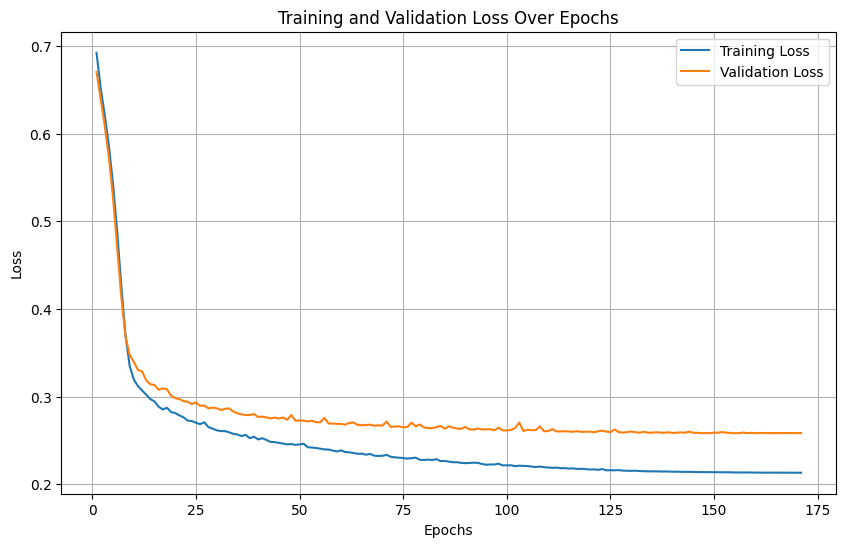

In [4]:
plot_loss(train_losses, val_losses)

In [5]:
import torch

torch.save(model.model.state_dict(), "../models/model_set_60.pth")